In [14]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [6]:
epochs = 100

In [7]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [8]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [9]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
    model_trained = history
    accuracy = model_trained.history['accuracy']
    val_accuracy = model_trained.history['val_accuracy']
    loss = model_trained.history['loss']
    val_loss = model_trained.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
    plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
    plt.title('Acurácia de treino e validação')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Perda no treino')
    plt.plot(epochs, val_loss, 'g', label='Perda na validação')
    plt.title('Perda na validação e treino')
    plt.legend()
    plt.show()

In [11]:
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=2)

Epoch 1/100


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\tmcle\AppData\Local\Temp\ipykernel_11568\260896851.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(testX, testY), verbose=2)


781/781 - 28s - loss: 2.1601 - accuracy: 0.2935 - val_loss: 1.5565 - val_accuracy: 0.4258 - 28s/epoch - 35ms/step
Epoch 2/100
781/781 - 21s - loss: 1.6129 - accuracy: 0.4119 - val_loss: 1.4885 - val_accuracy: 0.4569 - 21s/epoch - 27ms/step
Epoch 3/100
781/781 - 22s - loss: 1.4830 - accuracy: 0.4558 - val_loss: 1.5962 - val_accuracy: 0.4447 - 22s/epoch - 29ms/step
Epoch 4/100
781/781 - 22s - loss: 1.3987 - accuracy: 0.4923 - val_loss: 1.4500 - val_accuracy: 0.4867 - 22s/epoch - 29ms/step
Epoch 5/100
781/781 - 21s - loss: 1.3270 - accuracy: 0.5205 - val_loss: 1.3240 - val_accuracy: 0.5239 - 21s/epoch - 27ms/step
Epoch 6/100
781/781 - 21s - loss: 1.2780 - accuracy: 0.5393 - val_loss: 1.2241 - val_accuracy: 0.5567 - 21s/epoch - 27ms/step
Epoch 7/100
781/781 - 22s - loss: 1.2322 - accuracy: 0.5580 - val_loss: 1.1631 - val_accuracy: 0.5782 - 22s/epoch - 28ms/step
Epoch 8/100
781/781 - 22s - loss: 1.1957 - accuracy: 0.5720 - val_loss: 1.2571 - val_accuracy: 0.5460 - 22s/epoch - 28ms/step
Epoc

Epoch 66/100
781/781 - 22s - loss: 0.6351 - accuracy: 0.7819 - val_loss: 0.5889 - val_accuracy: 0.7957 - 22s/epoch - 28ms/step
Epoch 67/100
781/781 - 21s - loss: 0.6306 - accuracy: 0.7822 - val_loss: 0.5720 - val_accuracy: 0.8026 - 21s/epoch - 27ms/step
Epoch 68/100
781/781 - 21s - loss: 0.6253 - accuracy: 0.7832 - val_loss: 0.6323 - val_accuracy: 0.7829 - 21s/epoch - 27ms/step
Epoch 69/100
781/781 - 22s - loss: 0.6258 - accuracy: 0.7851 - val_loss: 0.6385 - val_accuracy: 0.7768 - 22s/epoch - 28ms/step
Epoch 70/100
781/781 - 22s - loss: 0.6230 - accuracy: 0.7851 - val_loss: 0.6084 - val_accuracy: 0.7880 - 22s/epoch - 28ms/step
Epoch 71/100
781/781 - 21s - loss: 0.6167 - accuracy: 0.7864 - val_loss: 0.5869 - val_accuracy: 0.7986 - 21s/epoch - 27ms/step
Epoch 72/100
781/781 - 21s - loss: 0.6093 - accuracy: 0.7892 - val_loss: 0.5668 - val_accuracy: 0.8013 - 21s/epoch - 27ms/step
Epoch 73/100
781/781 - 22s - loss: 0.6095 - accuracy: 0.7896 - val_loss: 0.5607 - val_accuracy: 0.8092 - 22s/ep

In [12]:
	_, acc = model.evaluate(testX, testY, verbose=2)
	print('> %.3f' % (acc * 100.0))

313/313 - 2s - loss: 0.5196 - accuracy: 0.8258 - 2s/epoch - 5ms/step
> 82.580


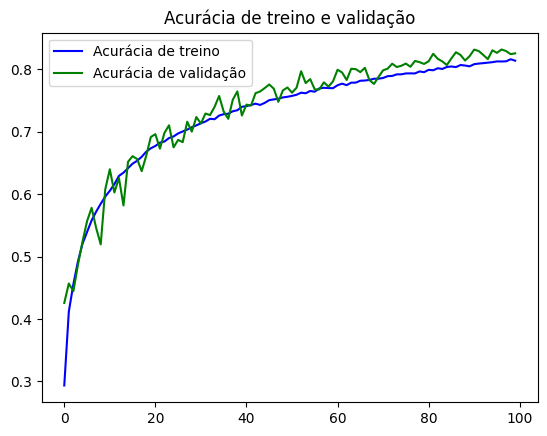

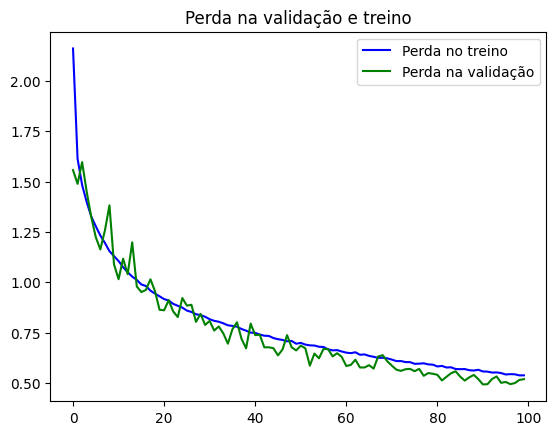

In [15]:
	summarize_diagnostics(history)

In [16]:
model_name = f'cifar-vgg-baseline-holdout-{epochs}epochs_all_transfer.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: cifar-vgg-baseline-holdout-100epochs_all_transfer.npy\assets


INFO:tensorflow:Assets written to: cifar-vgg-baseline-holdout-100epochs_all_transfer.npy\assets
